In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

DATA_PATH = "/deepsort/KITTI/RawData/2011_09_26/2011_09_26_drive_0005_sync/"

In [5]:
IMU_COLUMN_NAMES = ['lat','lon','alt','roll','pitch','yaw','vn','ve','vf','vl','vu','ax','ay','az','af',
                    'al','au','wx','wy','wz','wf','wl','wu','posacc','velacc','navstat','numsats','posmode',
                    'velmode','orimode']

def read_imu(path):
    df = pd.read_csv(path, header = None, sep = ' ')
    df.columns = IMU_COLUMN_NAMES
    return df

def compute_great_circle_distance(lat1,lon1,lat2,lon2):
    delta_sigma = float(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180)+
                        np.cos(lat1*np.pi/180)*np.cos(lat2*np.pi/180)*np.cos((lon1-lon2)*np.pi/180))
    return 6391000.0*np.arccos(np.clip(delta_sigma,-1,1))

    

In [16]:
pre_imu_data = None
gps_distance = []
imu_distance = []
for frame in range(150):
    imu_data = read_imu(os.path.join(DATA_PATH,'oxts/data/%010d.txt'%frame))
    if pre_imu_data is not None:
        lat1 = pre_imu_data.lat
        lon1 = pre_imu_data.lon
        lat2 = imu_data.lat
        lon2 = imu_data.lon
        gps_distance += [compute_great_circle_distance(lat1,lon1,lat2,lon2)]
        imu_distance += [0.1 * np.linalg.norm(imu_data[['vf','vl']])]
    pre_imu_data = imu_data

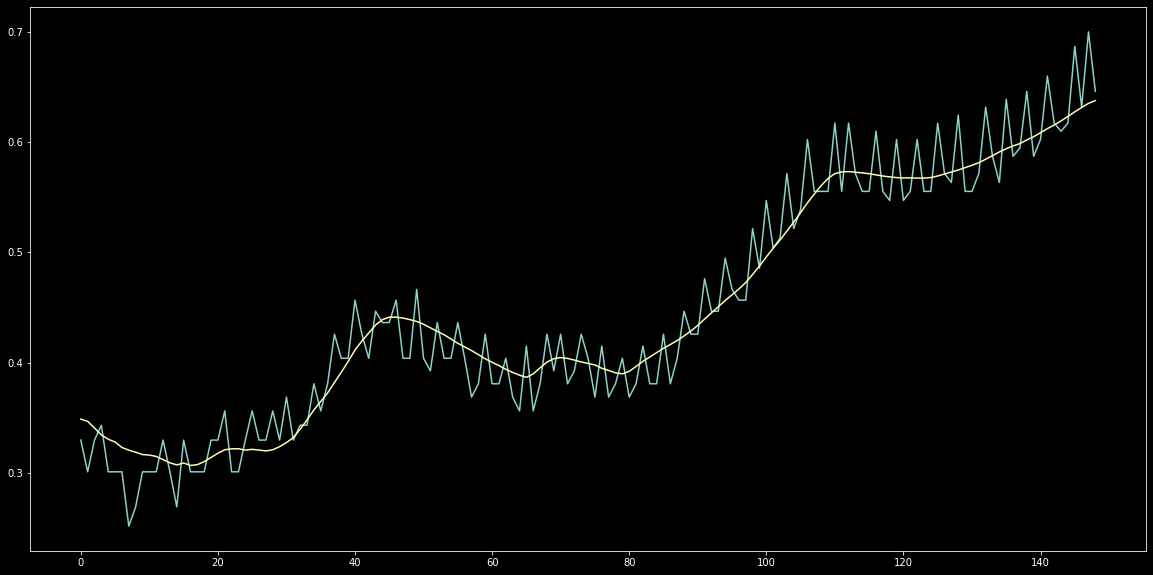

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(gps_distance)
plt.plot(imu_distance)

In [43]:
pre_imu_data = None
locations = []
for frame in range(150):
    imu_data = read_imu(os.path.join(DATA_PATH,'oxts/data/%010d.txt'%frame))
    if pre_imu_data is not None:
        dis = 0.1 * np.linalg.norm(imu_data[['vf','vl']])
        theta = float(imu_data.yaw - pre_imu_data.yaw)
        # for i in range(len(locations)):
        locations = np.c_[locations,np.ones(len(locations))]
        R = np.array([[np.cos(theta),np.sin(theta),-dis],
                      [-np.sin(theta),np.cos(theta),0]])
        locations = list(np.dot(R,locations.T).T)

    locations += [np.array([.0,.0])]
    pre_imu_data = imu_data

In [46]:
plt.plot(np.array(locations)[:,0],np.array(locations)[:,1])



TypeError: list indices must be integers or slices, not tuple

In [37]:
R = np.array([[np.cos(theta),np.sin(theta),-dis],
                [-np.sin(theta),np.cos(theta),0]])
R.shape

(2, 3)